In [2]:
import random 
random.seed(123)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import operator as op

In [3]:
data = pd.read_csv("dataset.txt",sep=";")
data.head()

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/987010488.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.txt",sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
missing = ['Sub_metering_3']
for i in missing:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()


In [6]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = data['Time'].astype(str)
data.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_col= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_col:
    data[i] = pd.to_numeric(data[i])

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/2312198835.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:
# Filling nan and all other illegal values with mean

for i in num_col:
    mean_ = data.loc[:,i].mean()
    data.loc[data.loc[:,i] == -1,i]=mean_

In [9]:
# data['power_consumption'] = (data['Global_active_power']*1000/60)-(data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3'])

In [10]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
data.corr()

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247031,-0.397305,0.998888,0.484401,0.434569,0.638553
Global_reactive_power,0.247031,1.000000,-0.110175,0.266119,0.123105,0.139225,0.089608
Voltage,-0.397305,-0.110175,1.000000,-0.408948,-0.194863,-0.166440,-0.266718
Global_intensity,0.998888,0.266119,-0.408948,1.000000,0.489298,0.440347,0.626542
Sub_metering_1,0.484401,0.123105,-0.194863,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139225,-0.166440,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638553,0.089608,-0.266718,0.626542,0.102571,0.080872,1.000000


# Voltage x Current vs Active Power

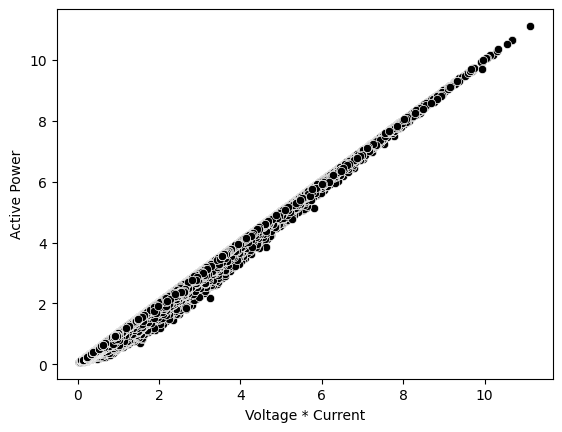

In [12]:
# Checking if data agrees with Voltage Power relationship
# Voltage * Current = Power

voltage = np.array(data["Voltage"])/1000.0 #Converting to kilo volt
current = np.array(data["Global_intensity"]) #current in ampere

VI = np.multiply(voltage, current)
power = np.array(data["Global_active_power"])

ax = sns.scatterplot(x=VI, y=power, color='black')
ax.set(xlabel='Voltage * Current', ylabel='Active Power')
plt.show()


The directly proporational relationship is maintained and this fact has been cemented from the data that voltage and current uniquely determine Active power. 

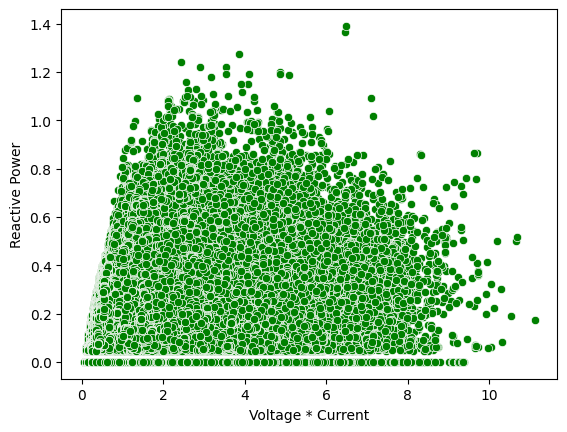

In [13]:
reactive_power = np.array(data["Global_reactive_power"])
ax = sns.scatterplot(x=VI, y=reactive_power, color='green')
ax.set(xlabel='Voltage * Current', ylabel='Reactive Power')
plt.show()

As reactive power is the total power loss due to appliances and it should theoretically be independent of active power consumed, and the data cements the fact.

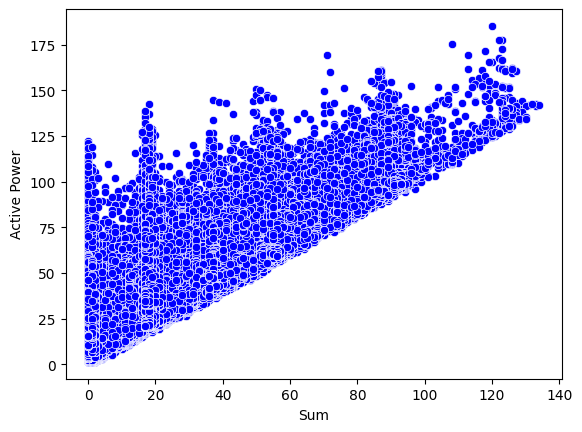

In [14]:
active_power_wh = power * 1000/60 #Active power is in kw averaged over minutes, converting it to wh for comparison purposes
metered_power1 = np.array(data["Sub_metering_1"])
metered_power2 = np.array(data["Sub_metering_2"])
metered_power3 = np.array(data["Sub_metering_3"])

sum_metered = np.add.reduce([metered_power1, metered_power2, metered_power3])
ax = sns.scatterplot(x=sum_metered, y=active_power_wh, color='blue')
ax.set(xlabel='Sum', ylabel='Active Power')
plt.show()


As we can see, Active Power >= Sum of the Metered Power. Every metered power is a part of active power.

# Time vs Active Power

Now we investigate whether time has any impact on the active power.

We have only two columns date, and time in hh:mm:ss. And after due investigation of the data wecan find that there are only 16  records of 2006, which might deceive our analysis, if we want some statistics where x-axis  is 'year'.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [16]:
data = data[pd.DatetimeIndex(data['Date']).year > 2006]

In [17]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [18]:
data_grpby_date = data.groupby(['Date']).mean()

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/3697002881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grpby_date = data.groupby(['Date']).mean()


In [19]:
df_active_power = data_grpby_date['Global_active_power']

In [20]:
df_active_power.head()

Date
2007-01-01    1.909031
2007-01-02    1.267194
2007-01-03    0.359419
2007-01-04    1.934689
2007-01-05    1.155457
Name: Global_active_power, dtype: float64

<AxesSubplot: xlabel='Year', ylabel='Average Yearly Active Power (KW)'>

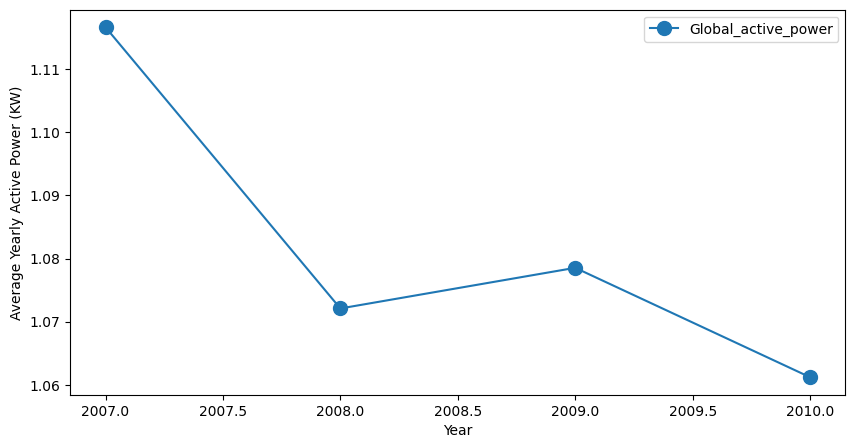

In [21]:
df_active_power.groupby(df_active_power.index.year).mean().plot(xlabel='Year',ylabel='Average Yearly Active Power (KW)',marker='.', markersize=20,legend=["Mean Active Power"], figsize=(10,5))

Annual Trends show that overall average power consumption is decreasing somewhat in this Time-Period.

<AxesSubplot: xlabel='Month', ylabel='Average monthly Active Power (KW)'>

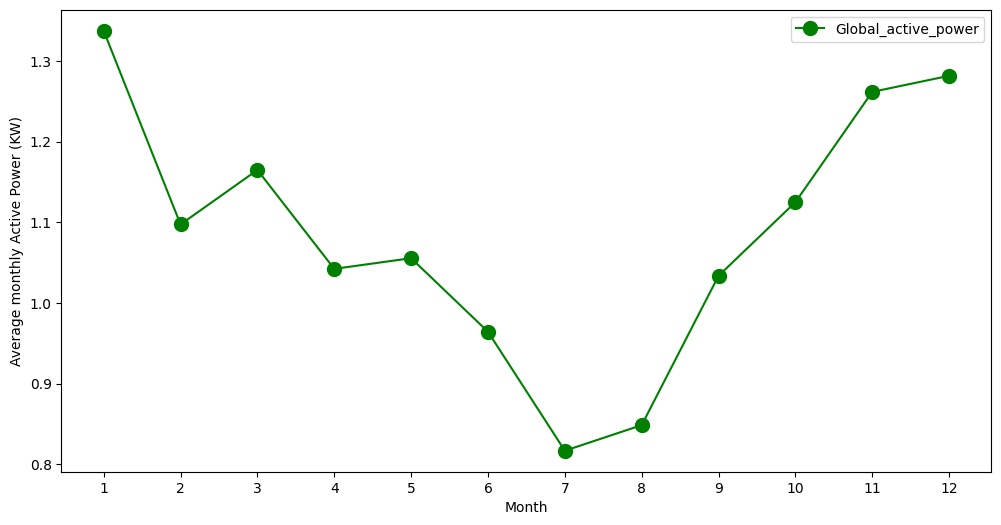

In [22]:
df_active_power.groupby(df_active_power.index.month).mean().plot(color='green', xlabel='Month',ylabel='Average monthly Active Power (KW)', marker='.', markersize=20, figsize=(12,6), xticks = np.arange(1, 13, 1), legend=["Mean Active Power"])

On a monthly scale, we notice that August has, on avg, the lowest power consumption.
We can see clearly, that less power is consumed in June, July, August, September, whereas more power is consumed during December, January, February.

If we look at Monthly Average Graph, we can see the power consumption starts decreasing almost after March month till August - September post which the power consumption increases gradually.

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/1995541201.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_active_power.groupby(df_active_power.index.week).mean().plot(color='black', xlabel='Week',ylabel='Weekly Average Active Power (KW)', marker='.', markersize=20, figsize=(12,6),legend=["Mean Active Power"])


<AxesSubplot: xlabel='Week', ylabel='Weekly Average Active Power (KW)'>

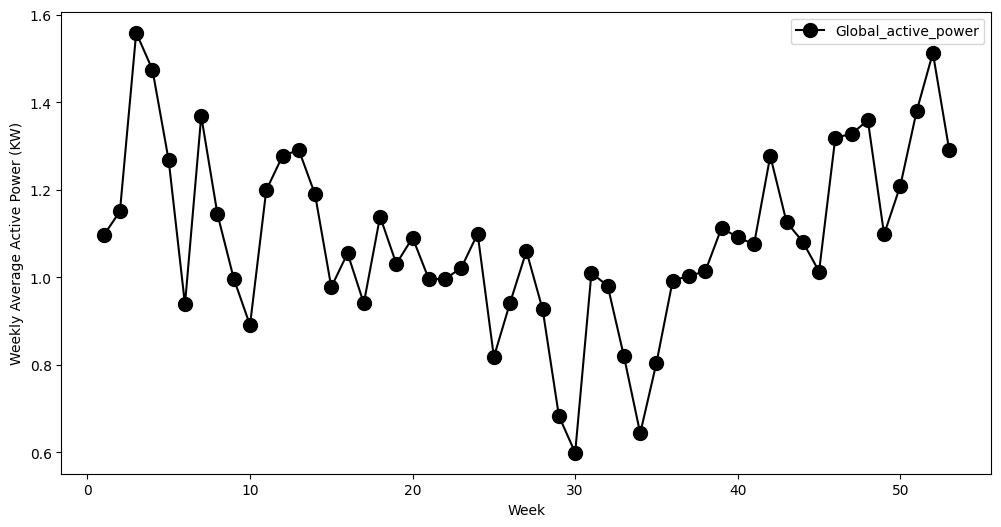

In [23]:
df_active_power.groupby(df_active_power.index.week).mean().plot(color='black', xlabel='Week',ylabel='Weekly Average Active Power (KW)', marker='.', markersize=20, figsize=(12,6),legend=["Mean Active Power"])

# Random Forest

In [31]:
def preprocess(filename):

    data = pd.read_csv(filename, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, header=1,
                       names=['Date','Time','Active_Power','Reactive_Power','Voltage','Current','Meter_1','Meter_2','Meter_3'])

    data['Active_Power'] = pd.to_numeric(data['Active_Power'], errors='coerce')
    data['Meter_2'] = pd.to_numeric(data['Meter_2'], errors='coerce')
    data['Current'] = pd.to_numeric(data['Current'], errors='coerce')
    data['Meter_1'] = pd.to_numeric(data['Meter_1'], errors='coerce')
    data['Meter_3'] = pd.to_numeric(data['Meter_3'], errors='coerce')
    data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

    
    data['Meter_3'].fillna(data['Meter_3'].mean(), inplace=True)
    data['Voltage'].fillna(data['Voltage'].mean(), inplace=True)
    data['Meter_1'].fillna(data['Meter_1'].mean(), inplace=True)
    data['Meter_2'].fillna(data['Meter_2'].mean(), inplace=True)
    data['Current'].fillna(data['Current'].mean(), inplace=True)
    data['Active_Power'].fillna(data['Active_Power'].mean(), inplace=True)
    
    
    # Aggregate Power over an hour duration
    data.set_index('Datetime', inplace=True)
    data = data.resample('h').mean()

    # Split Datetime Column
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['Hour'] = data.index.hour

    data.reset_index(inplace=True)
    data.drop(columns='Datetime', inplace=True)

    return data

In [32]:
dataset = "./dataset.txt"
data = preprocess(dataset)
data.head()

/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/814778218.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, header=1,
/var/folders/mt/718w34fs67l6sl06_fzp2cr00000gn/T/ipykernel_63679/814778218.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('h').mean()


,Active_Power,Voltage,Current,Meter_1,Meter_2,Meter_3,Year,Month,Day,Hour
0,4.223086,234.638286,18.091429,0.0,0.514286,16.857143,2006,12,16,17
1,3.632200,234.580167,15.600000,0.0,6.716667,16.866667,2006,12,16,18
2,3.400233,233.232500,14.503333,0.0,1.433333,16.683333,2006,12,16,19
3,3.268567,234.071500,13.916667,0.0,0.000000,16.783333,2006,12,16,20
4,3.056467,237.158667,13.046667,0.0,0.416667,17.216667,2006,12,16,21


In [33]:
x = data.drop('Active_Power',axis=1)
y = data['Active_Power']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

In [35]:
def predict(x, y, depth):
    model = RandomForestRegressor(n_estimators = 20, max_depth= depth )
    model.fit(x, y)

    y_pred = model.predict(x)
    return y_pred

In [36]:
depths = range(10,50)

training_rmse =[]
validation_rmse = []
training_r2 =[]
validation_r2 = []

for depth in depths:
    
    prediction = predict(x_train, y_train, depth)
    print(np.sqrt(mean_squared_error(y_train, prediction)))
    training_rmse.append(np.sqrt(mean_squared_error(y_train, prediction)))
    training_r2.append(r2_score(y_train,prediction))
    
for depth in depths:
    prediction = predict(x_test, y_test, depth)
    
    print(np.sqrt(mean_squared_error(y_test, prediction)))
    validation_rmse.append(np.sqrt(mean_squared_error(y_test, prediction)))
    validation_r2.append(r2_score(y_test,prediction))


0.015680901774120223
0.013566941852770823
0.01188496694477659
0.010557155404500494
0.00950712411091283
0.008895130229864982
0.008504363398908013
0.0081760722798124
0.008099585038296272
0.008083128864386072
0.008121508819855969
0.008040309566466673
0.007881374512895372
0.007889314125337126
0.007902547945718855
0.007965646376616797
0.007966527208069198
0.008136302721668447
0.008036181324367614
0.008002504286070973
0.007991361437157188
0.007865232776460743
0.007919760504372575
0.007967442868528449
0.008053181281404878
0.007962717414107808
0.008024309126178077
0.00790904945530987
0.007886803359030282
0.008094899571615868
0.007987441932891316
0.007916043939134955
0.008087874462663819
0.00795021344621985
0.008022982286510492
0.007889985898369875
0.008012459090679328
0.00809587134762064
0.007885668606398983
0.007987510743529729
0.014479463906623363
0.012329350845409157
0.011319826905274454
0.010358887238664979
0.010182924960357576
0.009664724072396212
0.009196418174346646
0.009381042387906964

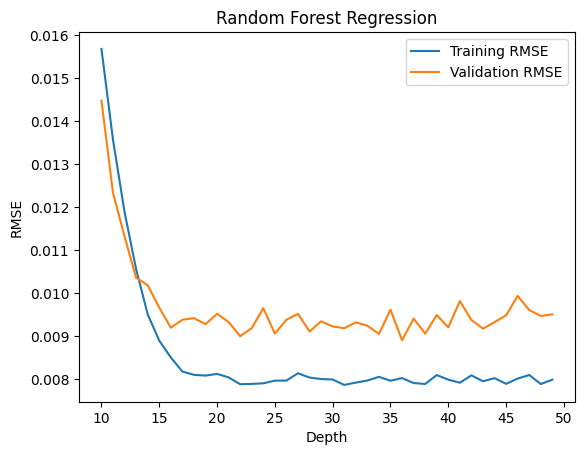

In [37]:
plt.figure()
plt.plot(depths,training_rmse,label = 'Training RMSE')
plt.plot(depths,validation_rmse,label = 'Validation RMSE')
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

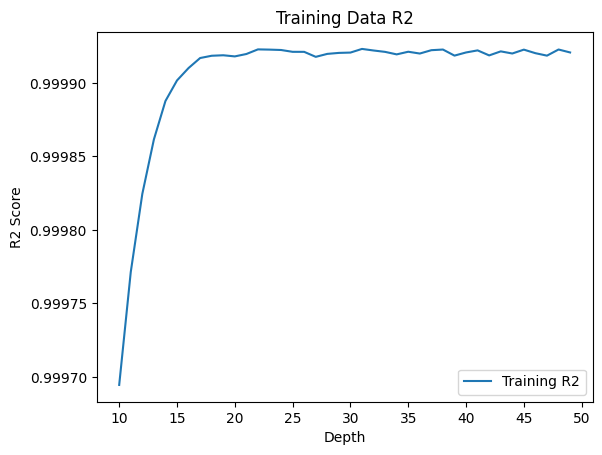

In [38]:
plt.figure()
plt.plot(depths,training_r2,label = 'Training R2')
plt.title('Training Data R2')
plt.xlabel('Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

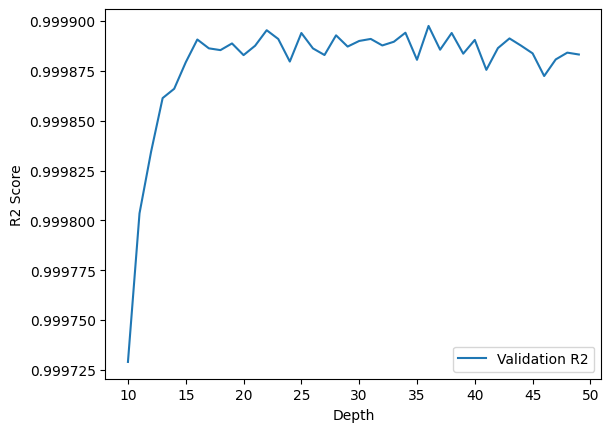

In [39]:
plt.figure()
plt.plot(depths,validation_r2,label = 'Validation R2')
plt.xlabel('Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [40]:
prediction = predict(x_train, y_train, 20)
print(np.sqrt(mean_squared_error(y_train, prediction)))

0.008006145984368331


In [41]:
model = RandomForestRegressor(n_estimators = 20, max_depth= 20 )
model.fit(x_test, y_test)
prediction = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

0.009523787810982938


In [42]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model.estimators_[1], 
                           feature_names=['Voltage','Current','Meter_1','Meter_2','Meter_3','Year','Month','Day','Hour',],
                           class_names=['Active_Power'], 
                           filled=True, impurity=True, 
                           rounded=True)

In [43]:
import graphviz
graph = graphviz.Source(dot_data, format='pdf')
graph.render('tree1')


'tree1.pdf'

In [44]:
dot_data_2 = export_graphviz(model.estimators_[5], 
                           feature_names=['Voltage','Current','Meter_1','Meter_2','Meter_3','Year','Month','Day','Hour',],
                           class_names=['Active_Power'], 
                           filled=True, impurity=True, 
                           rounded=True)

In [45]:
graph = graphviz.Source(dot_data_2, format='pdf')
graph.render('tree2')

'tree2.pdf'

In [46]:
dot_data_3 = export_graphviz(model.estimators_[10], 
                           feature_names=['Voltage','Current','Meter_1','Meter_2','Meter_3','Year','Month','Day','Hour',],
                           class_names=['Active_Power'], 
                           filled=True, impurity=True, 
                           rounded=True)

In [47]:
graph = graphviz.Source(dot_data_3, format='pdf')
graph.render('tree3')

'tree3.pdf'

In [48]:
dot_data_4 = export_graphviz(model.estimators_[15], 
                           feature_names=['Voltage','Current','Meter_1','Meter_2','Meter_3','Year','Month','Day','Hour',],
                           class_names=['Active_Power'], 
                           filled=True, impurity=True, 
                           rounded=True)

In [49]:
graph = graphviz.Source(dot_data_4, format='pdf')
graph.render('tree4')

'tree4.pdf'

In [50]:
dot_data_5 = export_graphviz(model.estimators_[19], 
                           feature_names=['Voltage','Current','Meter_1','Meter_2','Meter_3','Year','Month','Day','Hour',],
                           class_names=['Active_Power'], 
                           filled=True, impurity=True, 
                           rounded=True)

In [43]:
graph = graphviz.Source(dot_data_5, format='pdf')
graph.render('tree5')

'tree5.pdf'